In [1]:
# Clustering of timeseries data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import tsfresh
import sompy

In [2]:
agg = pd.read_csv('sku_labels.csv')
df = pd.read_csv('extracted_features.csv')
df.head()

,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
0,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,0.035937,0.011302,...,0.031519,-0.083333,0.000000,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
1,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,-0.006001,0.005213,...,-0.008633,0.014430,-0.014472,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
2,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,-0.028886,0.017587,...,-2.063037,-0.877874,-0.746398,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
3,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,-0.003946,0.005144,...,0.002933,-0.002941,0.000000,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
4,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,0.028471,0.021181,...,0.735336,2.065997,1.467626,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [3]:
agg.head()

,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory
0,28,TY,06,063,20G
1,34,TY,4,11,35A
2,100,BH,02,38,C09
3,152,BH,02,139,00L
4,182,TY,8,33,16K


In [4]:
df.dropna(axis=1, inplace=True)

In [5]:
df.shape

(3193, 442)

In [6]:
scale = MinMaxScaler()
skus = df['id']
df.set_index('id', inplace=True)
X = scale.fit_transform(df)

In [7]:
X.shape

(3193, 441)

In [8]:
names = df.columns

## SOMPY implementation

In [30]:
from sompy.sompy import SOMFactory

In [31]:
sm = SOMFactory().build(X, normalization = 'var', mapsize=(20,20), initialization='pca')
sm.train(n_job=1, verbose='info', train_rough_len=20, train_finetune_len=10)

 Training...
 pca_linear_initialization took: 0.096000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 20

 epoch: 1 ---> elapsed time:  0.142000, quantization error: 13.769746

 epoch: 2 ---> elapsed time:  0.140000, quantization error: 12.378965

 epoch: 3 ---> elapsed time:  0.139000, quantization error: 11.683135

 epoch: 4 ---> elapsed time:  0.138000, quantization error: 11.396942

 epoch: 5 ---> elapsed time:  0.139000, quantization error: 11.314711

 epoch: 6 ---> elapsed time:  0.137000, quantization error: 11.261395

 epoch: 7 ---> elapsed time:  0.140000, quantization error: 11.214534

 epoch: 8 ---> elapsed time:  0.136000, quantization error: 11.170476

 epoch: 9 ---> elapsed time:  0.138000, quantization error: 11.132558

 epoch: 10 ---> elapsed time:  0.142000, quantization error: 11.094987

 epoch: 11 ---> elapsed time:  0.147000, quantization error: 11.054452

 epoch: 12 ---> elapsed time:  0.150000, quantization error: 11.012321

 

In [32]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.14469151268399624; Quantization error = 10.41394683761397


In [33]:
from sompy.visualization.mapview import View2D

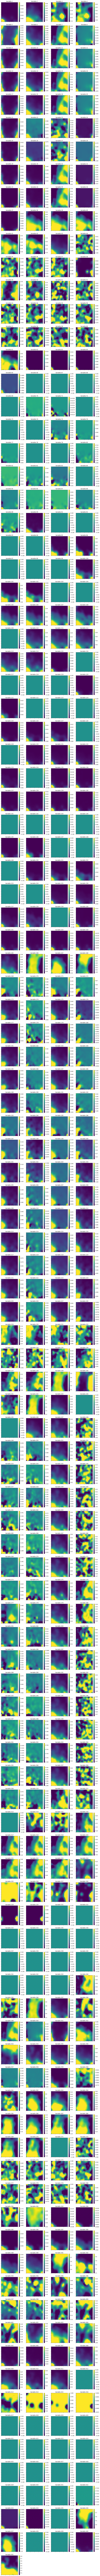

In [34]:
from sompy.visualization.mapview import View2D
view2D  = View2D(15,15,"time-series",text_size=10, names=names)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

In [35]:
from sompy.visualization.bmuhits import BmuHitsView

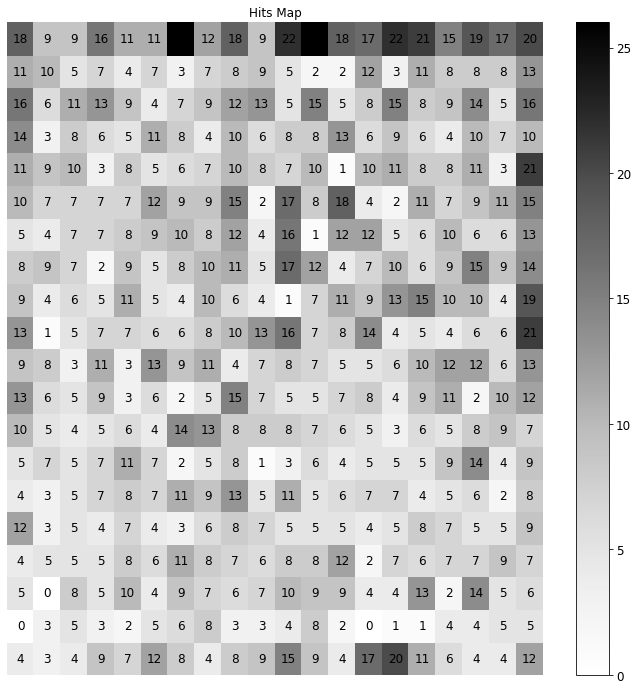

In [36]:
vhts  = BmuHitsView(12,12,"Hits Map",text_size=12)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

In [37]:
sm._calculate_ms_and_mpd()

(20, 0.1252740369558409)

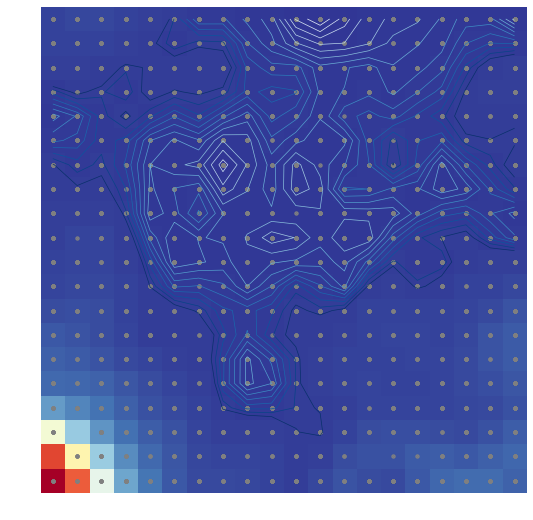

In [67]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
UMAT  = u.build_u_matrix(sm, distance=1, row_normalized=False)
UMAT = u.show(sm, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


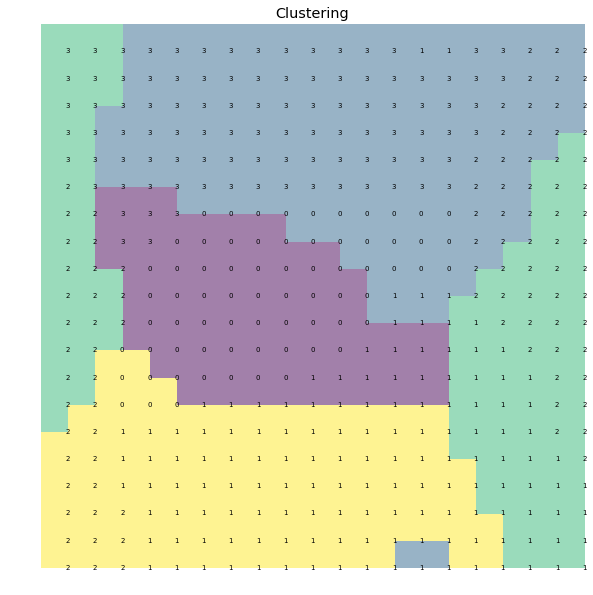

In [69]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(4)
hits  = HitMapView(10,10,"Clustering",text_size=12)
a=hits.show(sm)

In [41]:
from sklearn.cluster import KMeans

In [63]:
scores = {}
for i in range(1, 40):
    kmeans = KMeans(n_clusters=i)
    clusters_fit = kmeans.fit_predict(sm._normalizer.denormalize_by(sm.data_raw, sm.codebook.matrix))
    scores[i] = kmeans.inertia_

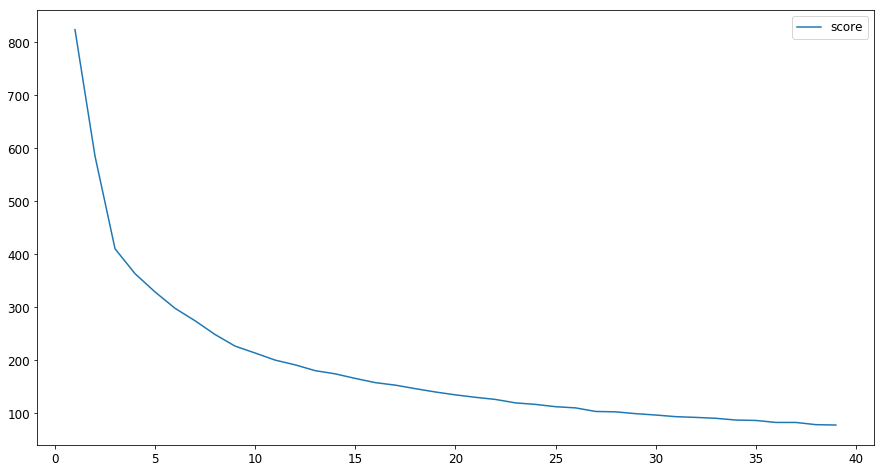

In [66]:
pd.DataFrame(scores, index=['score']).T.plot(figsize=(15,8))

In [70]:
clusters = sm.cluster(n_clusters=6)

In [71]:
clusters

array([2, 2, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 4, 4, 4, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 4, 4, 4,
       4, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 2, 2, 2, 2, 2,
       5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 2, 2, 2, 2, 2, 2, 5, 5,
       5, 5, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 1, 1, 1, 2, 2, 2, 2, 2, 5,

In [72]:
map_dict = {}
for i, j in enumerate(clusters):
    map_dict[i] = j

In [73]:
assignment = pd.DataFrame(sm._bmu).T

In [74]:
assignment[0] = assignment[0].astype(int)
assignment.head()

,0,1
0,59,8.851169
1,110,6.308747
2,302,11.121192
3,30,6.416395
4,350,9.526479


In [75]:
cluster_assignments = assignment[0].map(map_dict)

In [76]:
df_assigned = df.reset_index().join(pd.DataFrame(cluster_assignments))

In [77]:
df_assigned.head()

,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,0
0,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,0.035937,0.011302,...,-0.083333,0.000000,0.0,643.0,25.0,0.0,0.0,0.621100,0.0,0
1,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,-0.006001,0.005213,...,0.014430,-0.014472,0.0,600.0,78.0,0.0,0.0,0.236220,0.0,0
2,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,-0.028886,0.017587,...,-0.877874,-0.746398,0.0,171.0,157.0,0.0,0.0,5.145510,1.0,5
3,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,-0.003946,0.005144,...,-0.002941,0.000000,0.0,655.0,16.0,0.0,0.0,0.109897,0.0,0
4,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,0.028471,0.021181,...,2.065997,1.467626,0.0,327.0,135.0,0.0,0.0,4.060313,1.0,1


### To do:

* Clean up code and remove all redundant code
* Run EDA on clusters, see if you can extract meaning and the features that seperate them/


## t-SNE

In [78]:
dimred = TSNE()
plot_df = dimred.fit_transform(X)
plot_df = pd.DataFrame(plot_df).join(df.reset_index())
plot_df.head()

,0,1,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
0,-12.524939,-31.959347,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,0.031519,-0.083333,0.000000,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
1,1.164496,-21.070871,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,...,-0.008633,0.014430,-0.014472,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
2,-34.099712,42.586399,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,...,-2.063037,-0.877874,-0.746398,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
3,33.766972,-38.191803,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,...,0.002933,-0.002941,0.000000,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
4,-30.980940,14.631216,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,...,0.735336,2.065997,1.467626,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [79]:
dimred.kl_divergence_

1.5628044605255127

In [80]:
plot_df['sku_key'] = plot_df['id'].astype(int)
agg['sku_key'] = agg['sku_key'].astype(int)

plot_df = plot_df.merge(agg, how='left', on='sku_key')

In [87]:
listof = {}
for i, j in enumerate(plot_df['sku_department'].unique()):
    listof[j] = i

In [88]:
plot_df['sku_department'] = plot_df['sku_department'].map(listof)

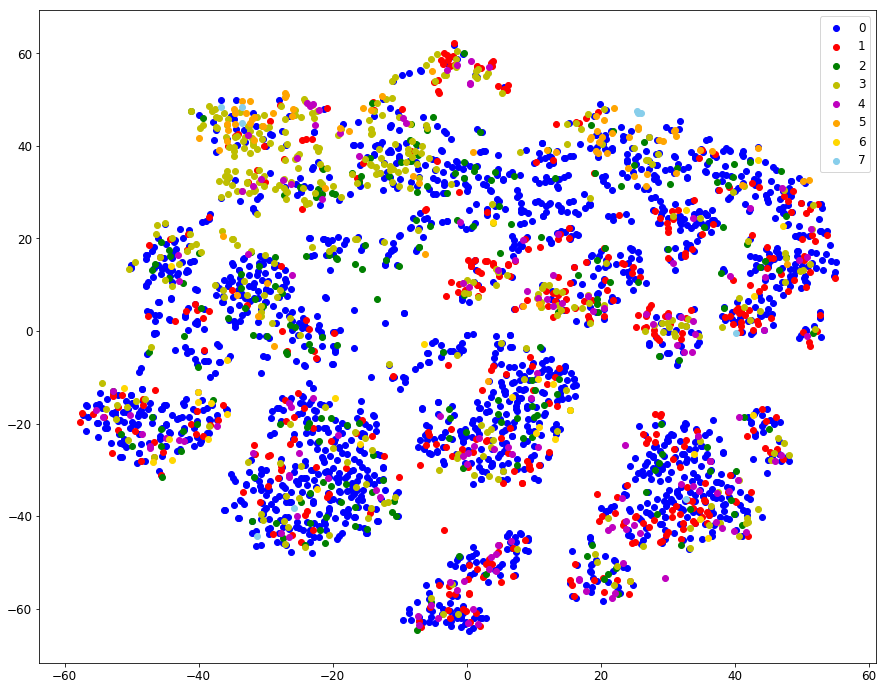

In [89]:
f, ax = plt.subplots(figsize=(15,12))

colors=['b', 'r', 'g', 'y', 'm', 'orange', 'gold', 'skyblue']

for i in plot_df['sku_department'].unique():
    ax.scatter(plot_df[plot_df['sku_department'] == i][0], plot_df[plot_df['sku_department'] == i][1],
    color=colors[i], label=i)           
    
ax.legend()

In [84]:
new_df = plot_df.join(pd.DataFrame(cluster_assignments), rsuffix='clus')
new_df.rename(columns={'0':'tsne1', 1:'tsne2', '0clus':'cluster'}, inplace=True)
new_df.head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster
0,-12.524939,-31.959347,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,0.0,0.0,0.621100,0.0,28,TY,06,0,20G,0
1,1.164496,-21.070871,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,...,0.0,0.0,0.236220,0.0,34,TY,4,1,35A,0
2,-34.099712,42.586399,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,...,0.0,0.0,5.145510,1.0,100,BH,02,2,C09,5
3,33.766972,-38.191803,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,...,0.0,0.0,0.109897,0.0,152,BH,02,3,00L,0
4,-30.980940,14.631216,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,...,0.0,0.0,4.060313,1.0,182,TY,8,4,16K,1


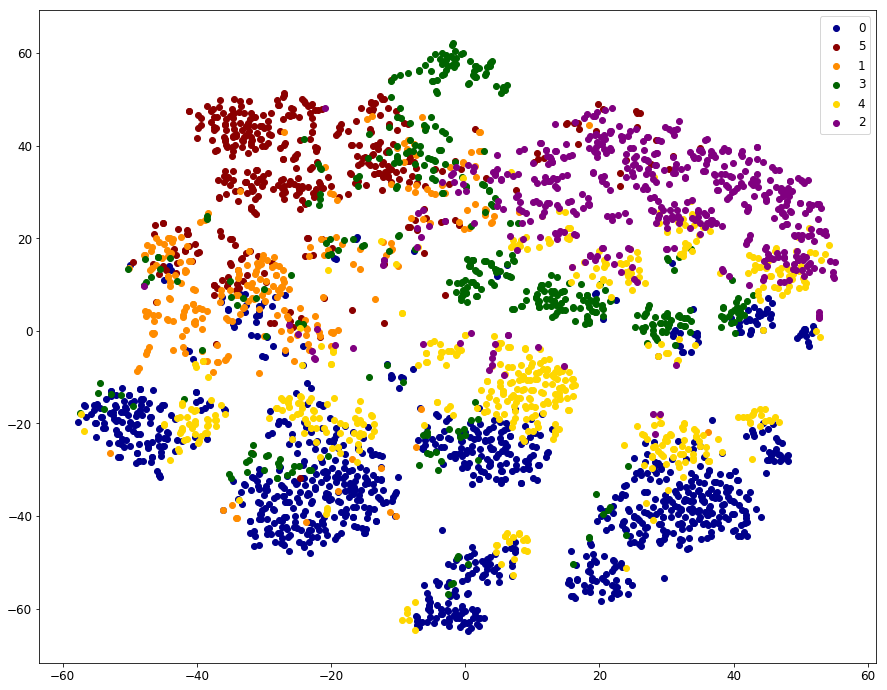

In [86]:
f, ax = plt.subplots(figsize=(15,12))

colors=['darkblue', 'darkorange', 'purple', 'darkgreen', 'gold', 'darkred']

for i in new_df['cluster'].unique():
    ax.scatter(new_df[new_df['cluster'] == i]['tsne1'], new_df[new_df['cluster'] == i]['tsne2'],
    color=colors[i], label=i)           
    
ax.legend()

## Extract insights from clusters

In [90]:
new_df.head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster
0,-12.524939,-31.959347,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,0.0,0.0,0.621100,0.0,28,TY,06,0,20G,0
1,1.164496,-21.070871,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,...,0.0,0.0,0.236220,0.0,34,TY,4,1,35A,0
2,-34.099712,42.586399,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,...,0.0,0.0,5.145510,1.0,100,BH,02,2,C09,5
3,33.766972,-38.191803,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,...,0.0,0.0,0.109897,0.0,152,BH,02,3,00L,0
4,-30.980940,14.631216,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,...,0.0,0.0,4.060313,1.0,182,TY,8,4,16K,1


In [91]:
product_sales = pd.read_csv('aggregate_products.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [124]:
product_sales['sku_key'] = product_sales['sku_key'].astype(int)
product_sales.drop(['sku_department', 'sku_subdepartment', 'sku_category', 'sku_subcategory'], axis=1, inplace=True)
product_sales.head()

,sku_key,tran_date,sales,selling_price,avg_discount
0,28,2016-03-02,1,89.9,0.0
1,28,2016-03-03,0,89.9,0.0
2,28,2016-03-04,0,89.9,0.0
3,28,2016-03-05,0,89.9,0.0
4,28,2016-03-06,0,89.9,0.0


In [125]:
cluster_dfs = {}
for i in new_df['cluster'].unique():
    cluster_dfs['cluster_{}'.format(i)] = new_df[new_df['cluster'] == i]

In [126]:
for i in cluster_dfs.keys():
    cluster_dfs[i] = cluster_dfs[i].merge(product_sales, on='sku_key')

In [127]:
cluster_dfs['cluster_0'].head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster,tran_date,sales,selling_price,avg_discount
0,-12.524939,-31.959347,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,28,TY,06,0,20G,0,2016-03-02,1,89.9,0.0
1,-12.524939,-31.959347,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,28,TY,06,0,20G,0,2016-03-03,0,89.9,0.0
2,-12.524939,-31.959347,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,28,TY,06,0,20G,0,2016-03-04,0,89.9,0.0
3,-12.524939,-31.959347,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,28,TY,06,0,20G,0,2016-03-05,0,89.9,0.0
4,-12.524939,-31.959347,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,28,TY,06,0,20G,0,2016-03-06,0,89.9,0.0




 cluster_0


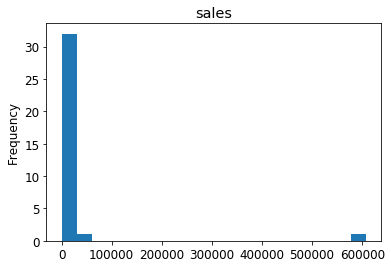

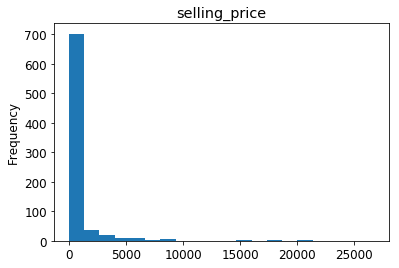

In [ ]:
for i in cluster_dfs.keys():
    print('\n\n', i)
    for j in ['sales', 'selling_price', 'avg_discount']:
        cluster_dfs[i][j].value_counts().plot(kind='hist', bins=20)
        plt.title(j)
        plt.show()